In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# cv2 to matplotlib
def cv2mat(img):
    b,g,r = cv2.split(img)
    ret = cv2.merge([r,g,b])
    return ret

def cv_show(img):
    plt.imshow(cv2mat(img))
    

def cv_show1(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey() #ms 不输入代表任意键销毁窗口
    cv2.destroyAllWindows()

# 用 matplotlib绘制直方图

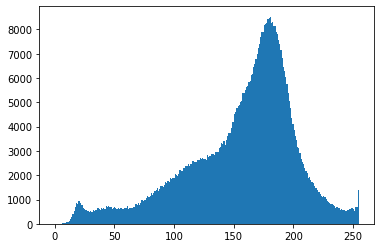

In [3]:
img = cv2.imread("01_Picture/01_cat.jpg")

plt.hist(img.ravel(), 256)
plt.show()

# cv2绘制直方图
cv2.calcHist(imgs,channels,mask,histSize,ranges)

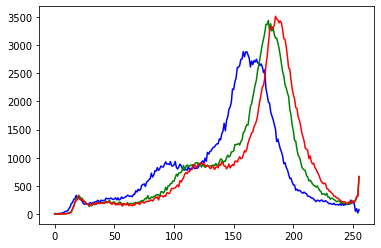

In [9]:
colors = ['b','g','r']
for index,color in enumerate(colors):
    hist = cv2.calcHist([img],[index],None,[256],[0,256])
    plt.plot(hist,c=color)

# 图像掩码区域

In [34]:
img_cat_gray_0 = cv2.imread("01_Picture/01_cat.jpg",0)

img_cat_gray_1 = img_cat_gray_0.copy()
img_cat_gray_1[100:300, 100:400] = 0

masked_img = cv2.bitwise_and(img_cat_gray,img_cat_gray_1,mask=None)
cv_show1(masked_img)

In [35]:
img_cat_gray = cv2.imread("01_Picture/01_cat.jpg",0)

mask = np.zeros(img_cat_gray.shape[:2],np.uint8)
mask[100:300, 100:400] = 255

masked_img = cv2.bitwise_and(img_cat_gray,img_cat_gray, mask=mask)
cv_show1(masked_img)

# 图像掩码直方图

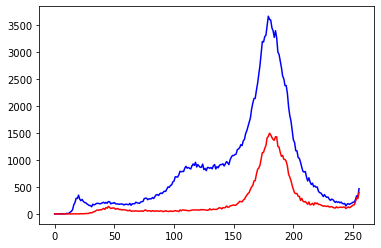

In [47]:
img_cat_gray = cv2.imread("01_Picture/01_cat.jpg",0)
hist_full = cv2.calcHist([img_cat_gray], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img_cat_gray], [0], mask, [256], [0,256])

plt.plot(hist_full,color='b')
plt.plot(hist_mask,color='r')

plt.show()

# 图像均衡化

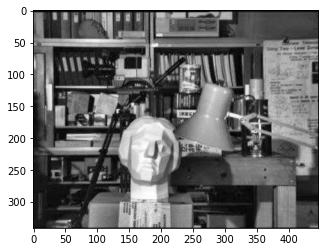

In [61]:
img = cv2.imread("01_Picture/16_Clahe.jpg")
cv_show(img)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

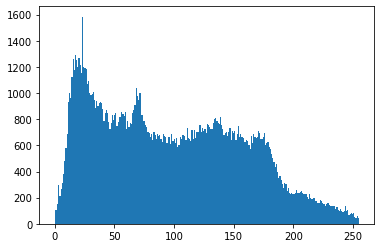

In [60]:
plt.hist(img_gray.flatten(),256)
plt.show()

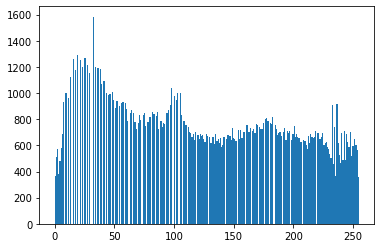

In [64]:
img_gray_equ = cv2.equalizeHist(img_gray)

plt.hist(img_gray_equ.flatten(),256)
plt.show()
cv_show1(img_gray_equ)

## 自适应直方图均衡化

In [76]:
img_gray = cv2.imread("01_Picture/16_Clahe.jpg",0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # 颜色对比度，分块的尺寸
img_gray_clahe = clahe.apply(img_gray)

compare_ = np.hstack((img_gray, img_gray_equ, img_gray_clahe))
cv_show1(compare_)

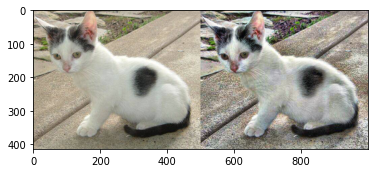

In [77]:
img_cat = cv2.imread("01_Picture/01_cat.jpg")
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

img_cat_clahe = []
for img_channel in cv2.split(img_cat):
    img_cat_clahe.append(clahe.apply(img_channel))
    
img_cat_clahe = cv2.merge(img_cat_clahe)

compare_ = np.hstack((img_cat, img_cat_clahe))
cv_show(compare_)